<a href="https://colab.research.google.com/github/AdarshJha5/Openplay-Assignment/blob/main/Openplay_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Dataset

In [118]:
data = pd.read_csv('/content/Dataset1 (2) (2).csv')


# EDA
#### To begin with, we will perform some data cleaning and Exploratory Data Analysis (EDA) on the provided dataset using Python. This will help us understand the data better and identify any potential issues or anomalies before proceeding with further analysis.

##Top 5 rows of the whole dataset

In [74]:
data.head()

,userid,Average Screen Time (mins),Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17,634,1,9,7,2990,Installed
1,1002,0,54,0,4,8,24008,Uninstalled
2,1003,37,207,0,8,5,971,Installed
3,1004,32,445,1,6,2,799,Installed
4,1005,45,427,1,5,6,3668,Installed


##Column Names

In [75]:
data.columns

Index(['userid', 'Average Screen Time (mins)', 'Average Spent on App (INR)',
       'Left Review', 'Ratings', 'New Password Request',
       'Last Visited Minutes', 'Status'],
      dtype='object')

##Count of Columns and Rows in the dataset.

In [76]:
data.shape

(999, 8)

## Check for missing values


In [77]:
print('Missing values in each column:')
print(data.isnull().sum())

Missing values in each column:
userid                        0
Average Screen Time (mins)    0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                        0
dtype: int64


## Check for duplicate rows


In [78]:
print('\nNumber of duplicate rows:', data.duplicated().sum())


Number of duplicate rows: 0


## Check data types


In [79]:
print('\nData types of columns:')
print(data.dtypes)


Data types of columns:
userid                         int64
Average Screen Time (mins)     int64
Average Spent on App (INR)     int64
Left Review                    int64
Ratings                        int64
New Password Request           int64
Last Visited Minutes           int64
Status                        object
dtype: object


## Descriptive statistics


In [80]:
print('\nDescriptive statistics:')
print(data.describe())


Descriptive statistics:
            userid  Average Screen Time (mins)  Average Spent on App (INR)  \
count   999.000000                  999.000000                  999.000000   
mean   1500.000000                   24.390390                  424.415415   
std     288.530761                   14.235415                  312.365695   
min    1001.000000                    0.000000                    0.000000   
25%    1250.500000                   12.000000                   96.000000   
50%    1500.000000                   24.000000                  394.000000   
75%    1749.500000                   36.000000                  717.500000   
max    1999.000000                   50.000000                  998.000000   

       Left Review     Ratings  New Password Request  Last Visited Minutes  
count   999.000000  999.000000            999.000000            999.000000  
mean      0.497497    6.513514              4.941942           5110.898899  
std       0.500244    2.701511           

## Check for unique values in categorical columns


In [81]:
print('\nUnique values in categorical columns:')
for col in ['Left Review', 'Status']:
    print(f'{col}: {data[col].unique()}')


Unique values in categorical columns:
Left Review: [1 0]
Status: ['Installed' 'Uninstalled']


#Cohorts

## Cohort 1: Based on Average Screen Time


In [82]:
cohort1 = data.groupby(pd.cut(data['Average Screen Time (mins)'], bins=[0, 10, 20, 30, 40, 50]))['userid'].count().reset_index()
cohort1.columns = ['Screen Time Range', 'Number of Users']
print('Cohort 1: Average Screen Time')
print(cohort1)

Cohort 1: Average Screen Time
  Screen Time Range  Number of Users
0           (0, 10]              193
1          (10, 20]              211
2          (20, 30]              201
3          (30, 40]              203
4          (40, 50]              171


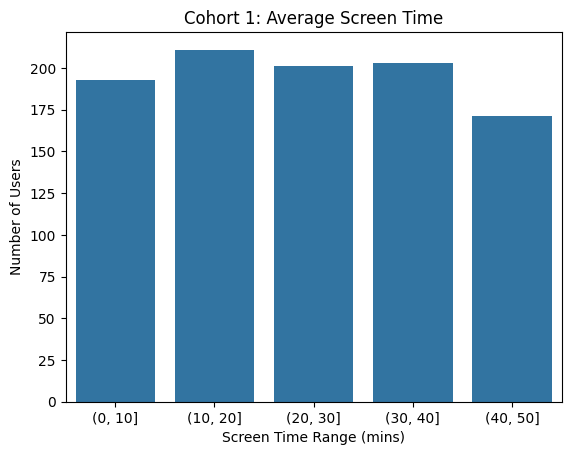

In [83]:
sns.barplot(x='Screen Time Range', y='Number of Users', data=cohort1)
plt.xlabel('Screen Time Range (mins)')
plt.ylabel('Number of Users')
plt.title('Cohort 1: Average Screen Time')
plt.show()


## Cohort 2: Based on Average Spent on App

In [84]:
cohort2 = data.groupby(pd.cut(data['Average Spent on App (INR)'], bins=[0, 200, 400, 600, 800, 1000]))['userid'].count().reset_index()
cohort2.columns = ['Spend Range', 'Number of Users']
print('\nCohort 2: Average Spent on App')
print(cohort2)


Cohort 2: Average Spent on App
   Spend Range  Number of Users
0     (0, 200]              330
1   (200, 400]              174
2   (400, 600]              158
3   (600, 800]              162
4  (800, 1000]              173


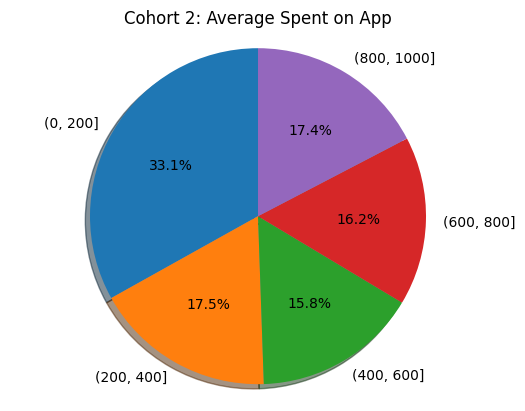

In [85]:
import matplotlib.pyplot as plt

labels = cohort2['Spend Range']
sizes = cohort2['Number of Users']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Cohort 2: Average Spent on App')
plt.show()


## Cohort 3: Based on Ratings


In [86]:
cohort3 = data.groupby(data['Ratings'])['userid'].count().reset_index()
cohort3.columns = ['Ratings', 'Number of Users']
print('\nCohort 3: Ratings')
print(cohort3)


Cohort 3: Ratings
    Ratings  Number of Users
0         0               38
1         1               32
2         2               42
3         3               32
4         4               35
5         5              141
6         6              131
7         7              136
8         8              133
9         9              142
10       10              137


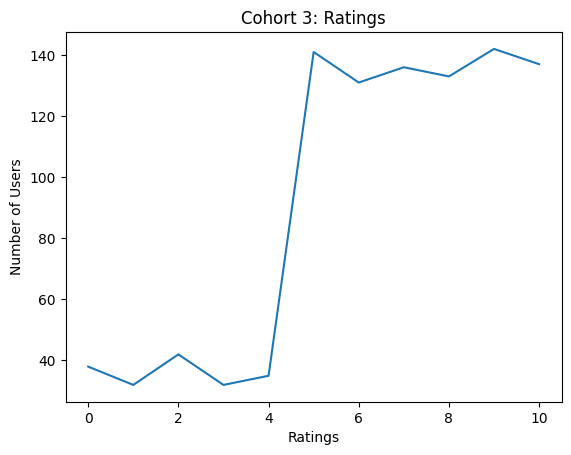

In [87]:
plt.plot(cohort3['Ratings'], cohort3['Number of Users'])
plt.xlabel('Ratings')
plt.ylabel('Number of Users')
plt.title('Cohort 3: Ratings')
plt.show()


## Cohort 4: Based on New Password Request


In [88]:
cohort4 = data.groupby(data['New Password Request'])['userid'].count().reset_index()
cohort4.columns = ['New Password Request', 'Number of Users']
print('\nCohort 4: New Password Request')
print(cohort4)


Cohort 4: New Password Request
    New Password Request  Number of Users
0                      1              121
1                      2              106
2                      3              108
3                      4              122
4                      5              113
5                      6              138
6                      7              120
7                      8              123
8                      9                7
9                     10               10
10                    11                8
11                    12                2
12                    13                5
13                    14                5
14                    15               11


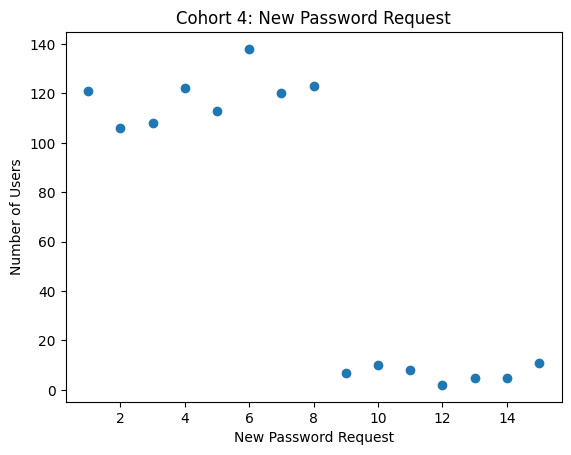

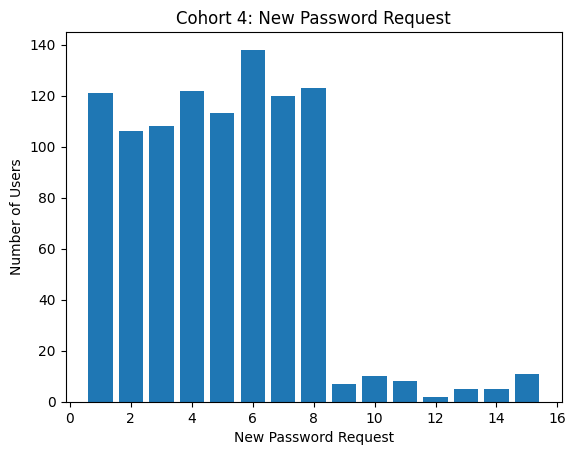

In [89]:
plt.scatter(cohort4['New Password Request'], cohort4['Number of Users'])
plt.xlabel('New Password Request')
plt.ylabel('Number of Users')
plt.title('Cohort 4: New Password Request')
plt.show()


cohort4 = data.groupby(data['New Password Request'])['userid'].count().reset_index()
cohort4.columns = ['New Password Request', 'Number of Users']

plt.bar(cohort4['New Password Request'], cohort4['Number of Users'])
plt.xlabel('New Password Request')
plt.ylabel('Number of Users')
plt.title('Cohort 4: New Password Request')
plt.show()


## Cohort 5: Based on Last Visited Minutes


In [90]:
cohort5 = data.groupby(pd.cut(data['Last Visited Minutes'], bins=[0, 1000, 2000, 3000, 4000, 5000, 50000]))['userid'].count().reset_index()
cohort5.columns = ['Last Visited Range', 'Number of Users']
print('\nCohort 5: Last Visited Minutes')
print(cohort5)


Cohort 5: Last Visited Minutes
  Last Visited Range  Number of Users
0          (0, 1000]              157
1       (1000, 2000]              193
2       (2000, 3000]              179
3       (3000, 4000]              172
4       (4000, 5000]              193
5      (5000, 50000]              105


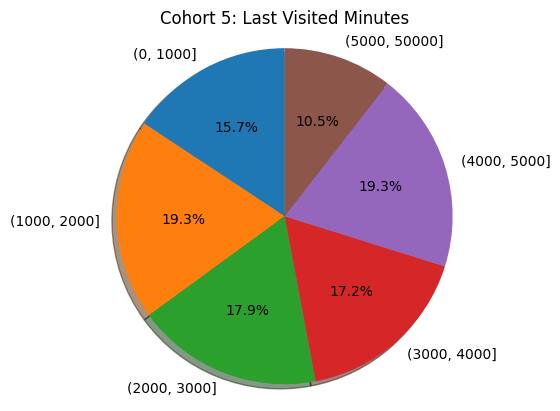

In [91]:
labels = cohort5['Last Visited Range']
sizes = cohort5['Number of Users']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Cohort 5: Last Visited Minutes')
plt.show()

## Cohort 6: Based on Status


In [92]:
cohort6 = data.groupby(data['Status'])['userid'].count().reset_index()
cohort6.columns = ['Status', 'Number of Users']
print('\nCohort 6: Status')
print(cohort6)


Cohort 6: Status
        Status  Number of Users
0    Installed              916
1  Uninstalled               83


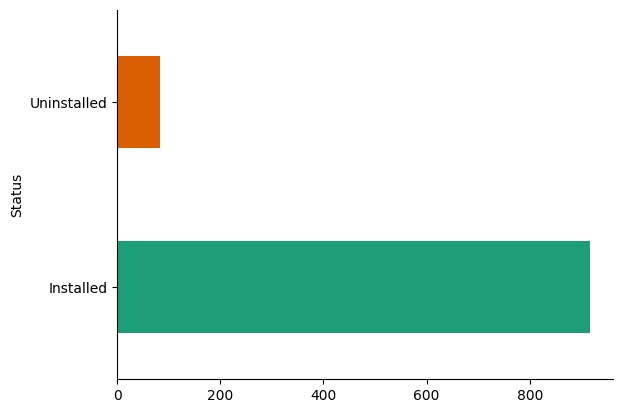

In [93]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Cohort 7: User cohorts
### Combination of Cohort 1,2,& 3.

In [94]:
user_cohorts = pd.concat([cohort1, cohort2, cohort3], axis=1)
user_cohorts



,Screen Time Range,Number of Users,Spend Range,Number of Users,Ratings,Number of Users
0,"(0.0, 10.0]",193.0,"(0.0, 200.0]",330.0,0,38
1,"(10.0, 20.0]",211.0,"(200.0, 400.0]",174.0,1,32
2,"(20.0, 30.0]",201.0,"(400.0, 600.0]",158.0,2,42
3,"(30.0, 40.0]",203.0,"(600.0, 800.0]",162.0,3,32
4,"(40.0, 50.0]",171.0,"(800.0, 1000.0]",173.0,4,35
5,NaN,NaN,NaN,NaN,5,141
6,NaN,NaN,NaN,NaN,6,131
7,NaN,NaN,NaN,NaN,7,136
8,NaN,NaN,NaN,NaN,8,133
9,NaN,NaN,NaN,NaN,9,142


Spend Range        (0, 200]  (200, 400]  (400, 600]  (600, 800]  (800, 1000]
Screen Time Range                                                           
(0, 10]                   1           0           0           0            0
(10, 20]                  0           1           0           0            0
(20, 30]                  0           0           1           0            0
(30, 40]                  0           0           0           1            0
(40, 50]                  0           0           0           0            1


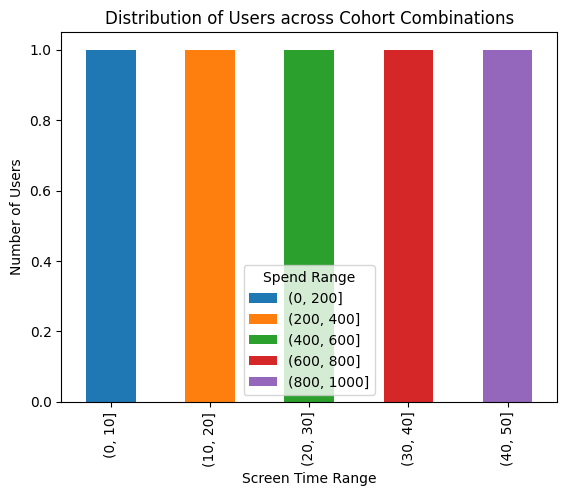

In [95]:
# Cross-tabulation of users across cohort combinations
user_cohorts_crosstab = pd.crosstab(user_cohorts['Screen Time Range'], user_cohorts['Spend Range'])

# Display the cross-tabulation
print(user_cohorts_crosstab)

user_cohorts_crosstab.plot(kind="bar", stacked=True)
plt.xlabel('Screen Time Range')
plt.ylabel('Number of Users')
plt.title('Distribution of Users across Cohort Combinations')
plt.show()

# Analysis

##User Engagement and Retention

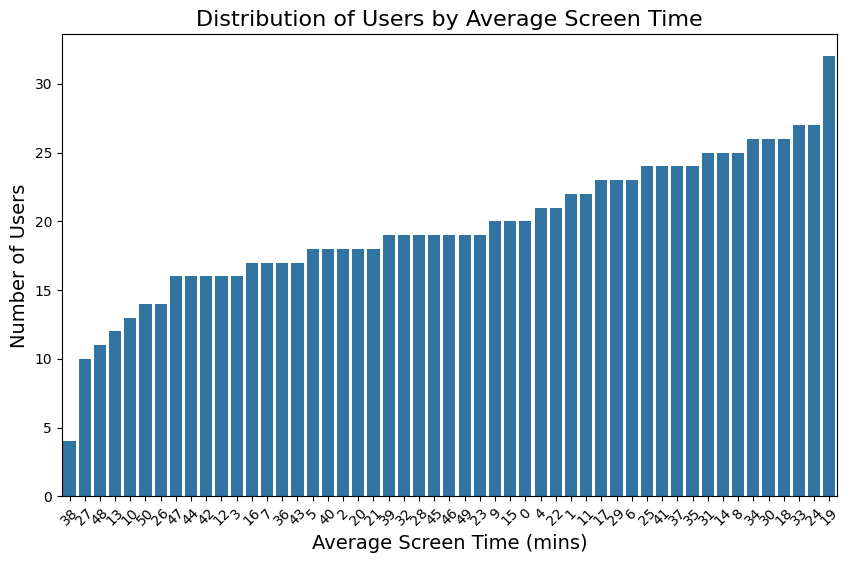

In [96]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Average Screen Time (mins)', order=data.groupby('Average Screen Time (mins)')['userid'].count().sort_values(ascending=False).index)
plt.title('Distribution of Users by Average Screen Time', fontsize=16)
plt.xlabel('Average Screen Time (mins)', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.xticks(rotation=45)
plt.gca().invert_xaxis()
plt.show()


## Revenue Potential

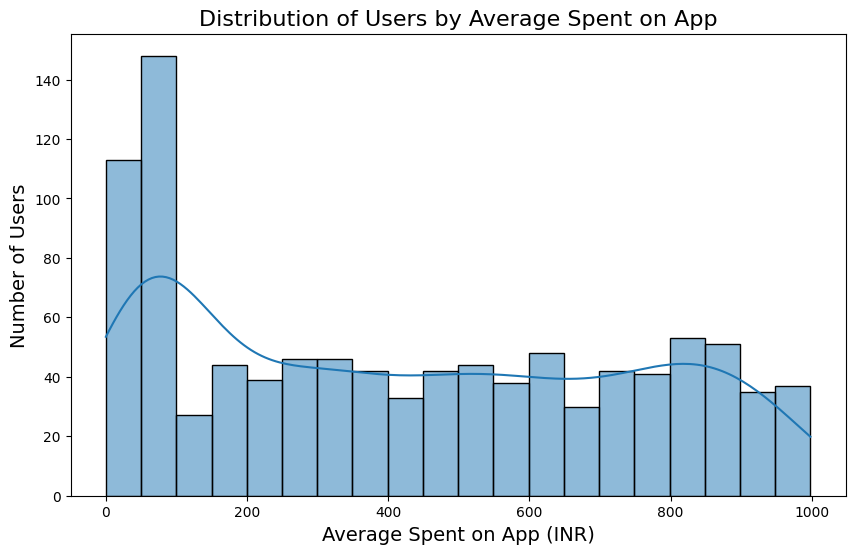

In [97]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Average Spent on App (INR)', bins=20, kde=True)
plt.title('Distribution of Users by Average Spent on App', fontsize=16)
plt.xlabel('Average Spent on App (INR)', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.show()

## User Satisfaction

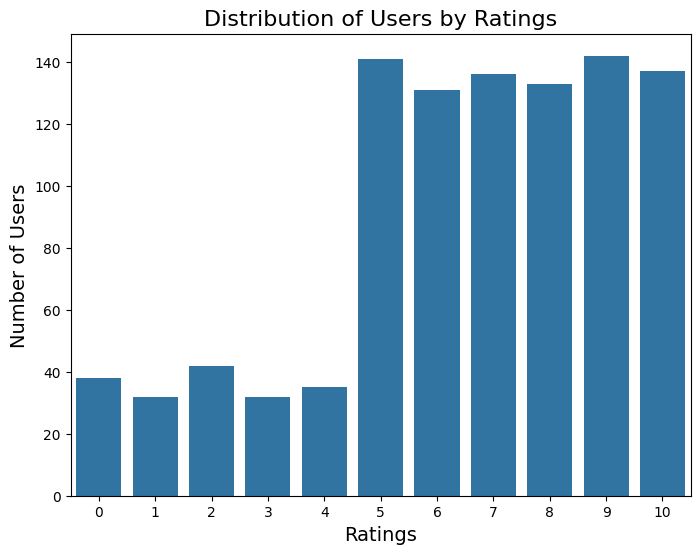

In [98]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Ratings', order=data['Ratings'].sort_values().unique())
plt.title('Distribution of Users by Ratings', fontsize=16)
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.show()

##User Experience Optimization


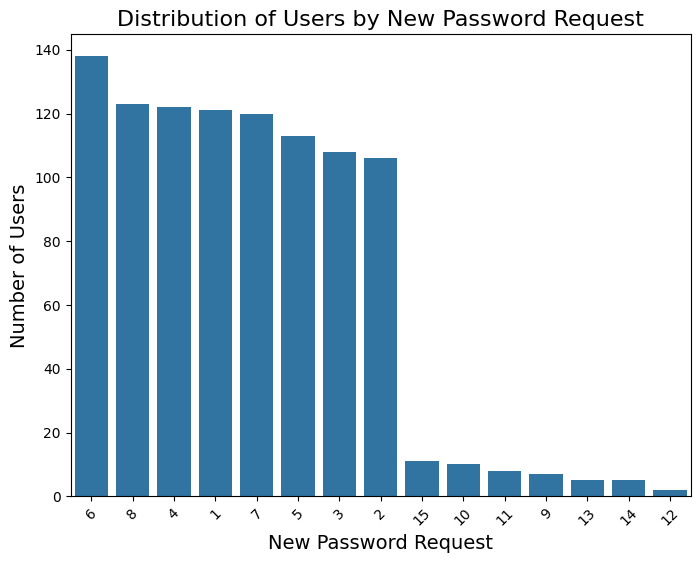

In [99]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='New Password Request', order=data['New Password Request'].value_counts().index)
plt.title('Distribution of Users by New Password Request', fontsize=16)
plt.xlabel('New Password Request', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.xticks(rotation=45)
plt.show()

##Churn Analysis

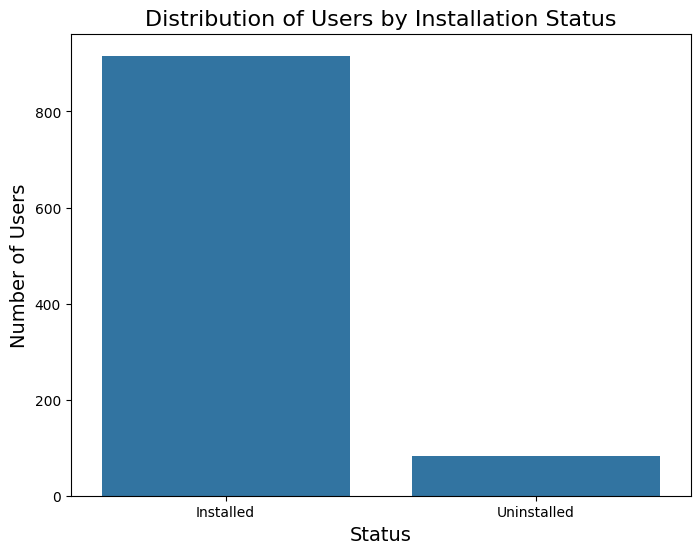

In [100]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Status')
plt.title('Distribution of Users by Installation Status', fontsize=16)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.show()

# Insights

##1. Correlation between Average Screen Time and Average Spent





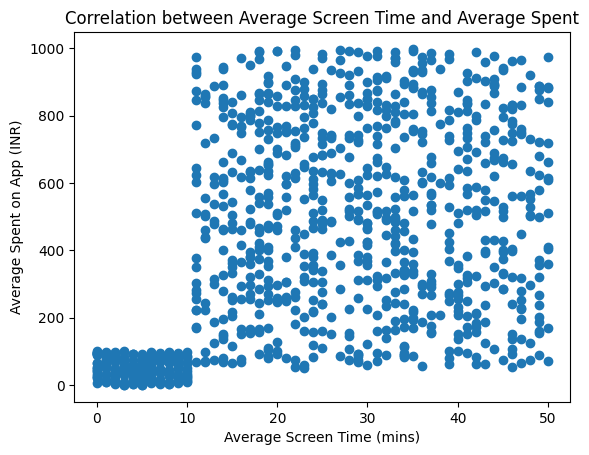

In [101]:
plt.scatter(data['Average Screen Time (mins)'], data['Average Spent on App (INR)'])
plt.xlabel('Average Screen Time (mins)')
plt.ylabel('Average Spent on App (INR)')
plt.title('Correlation between Average Screen Time and Average Spent')
plt.show()


##2. Users who left a review vs. those who didn't

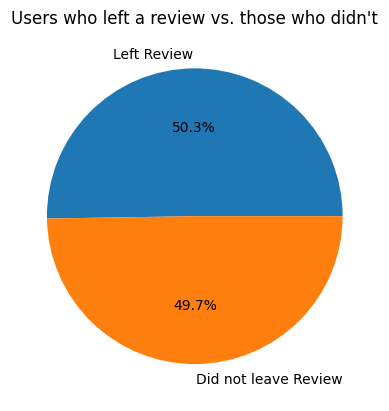

In [102]:
left_review = data['Left Review'].value_counts()

plt.pie(left_review, labels=['Left Review', 'Did not leave Review'], autopct='%1.1f%%')
plt.title('Users who left a review vs. those who didn\'t')
plt.show()

##3. Relation between User Review on Ratings

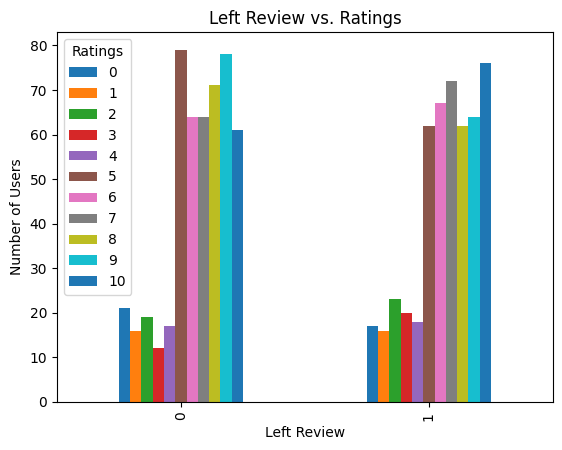

In [103]:
# Crosstab of Left Review and Ratings
review_ratings_crosstab = pd.crosstab(data['Left Review'], data['Ratings'])

# Plot the crosstab as a bar chart
review_ratings_crosstab.plot(kind='bar')
plt.xlabel('Left Review')
plt.ylabel('Number of Users')
plt.title('Left Review vs. Ratings')
plt.show()


##4. Average Screen Time for installed vs. uninstalled users

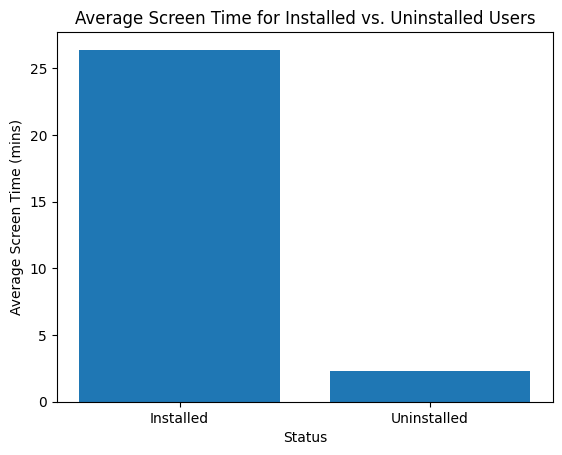

In [104]:
average_screen_time_installed = data[data['Status'] == 'Installed']['Average Screen Time (mins)'].mean()
average_screen_time_uninstalled = data[data['Status'] == 'Uninstalled']['Average Screen Time (mins)'].mean()

plt.bar(['Installed', 'Uninstalled'], [average_screen_time_installed, average_screen_time_uninstalled])
plt.xlabel('Status')
plt.ylabel('Average Screen Time (mins)')
plt.title('Average Screen Time for Installed vs. Uninstalled Users')
plt.show()

##5. Last Visited Minutes vs Average Spent on the App

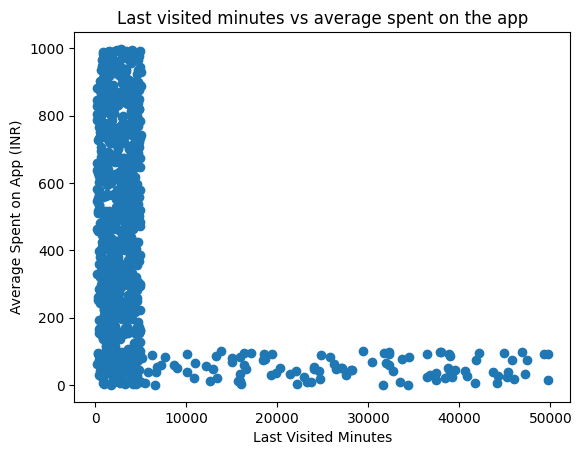

In [105]:
plt.scatter(data['Last Visited Minutes'], data['Average Spent on App (INR)'])
plt.xlabel('Last Visited Minutes')
plt.ylabel('Average Spent on App (INR)')
plt.title('Last visited minutes vs average spent on the app')
plt.show()

##6. New Password Request vs Average Spent on App (INR)*italicized text*

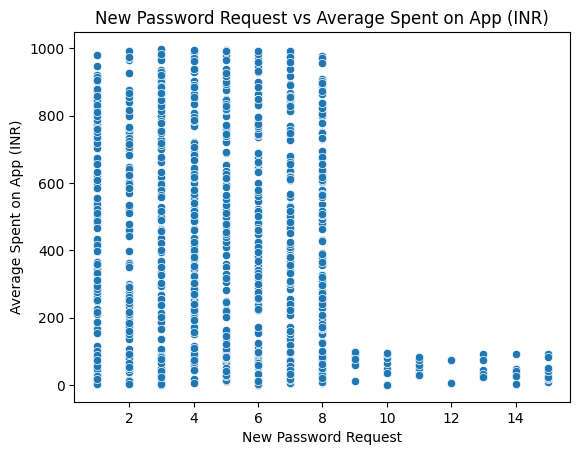

In [107]:
sns.scatterplot(data=data, x="New Password Request", y="Average Spent on App (INR)")
plt.xlabel("New Password Request")
plt.ylabel("Average Spent on App (INR)")
plt.title("New Password Request vs Average Spent on App (INR)")
plt.show()


##7. New Password behvior in Top 10 & Bottom 10 users on basis of Average Spent on App (INR)

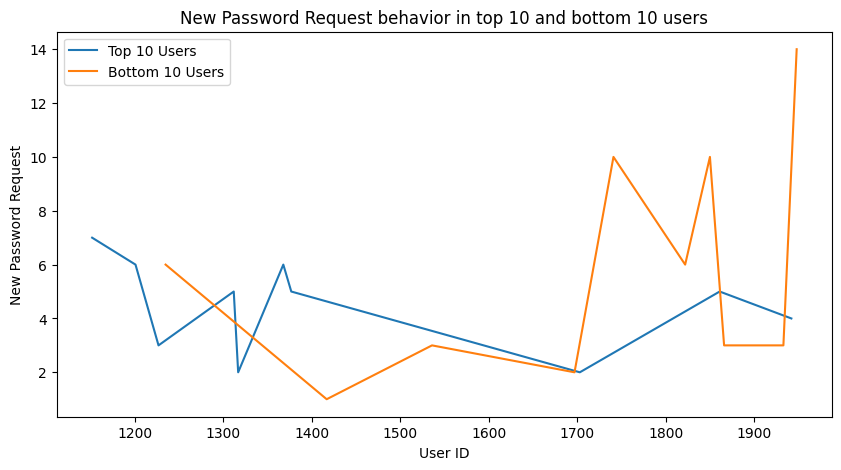

In [108]:
# Top 10 users based on average spent on app
top_10_users_spent = data.sort_values(by='Average Spent on App (INR)', ascending=False).head(10)

# Bottom 10 users based on average spent on app
bottom_10_users_spent = data.sort_values(by='Average Spent on App (INR)', ascending=True).head(10)

# Line plot to visualize the behavior of top 10 and bottom 10 users based on new password request
plt.figure(figsize=(10, 5))
sns.lineplot(data=top_10_users_spent, x='userid', y='New Password Request', label='Top 10 Users')
sns.lineplot(data=bottom_10_users_spent, x='userid', y='New Password Request', label='Bottom 10 Users')
plt.xlabel('User ID')
plt.ylabel('New Password Request')
plt.title('New Password Request behavior in top 10 and bottom 10 users')
plt.legend()
plt.show()


##8. Ratings vs Average Spent on App (INR)

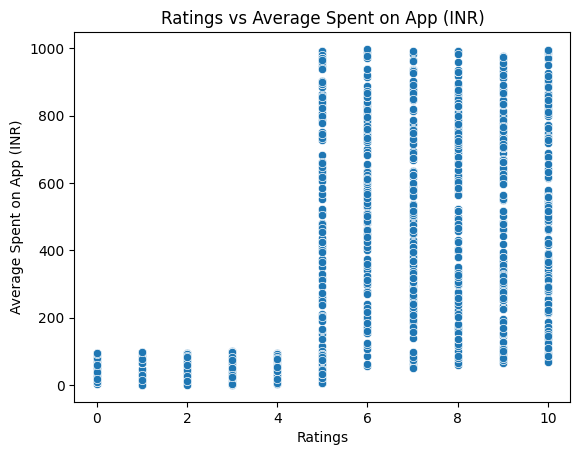

In [109]:
sns.scatterplot(data=data, x="Ratings", y="Average Spent on App (INR)")
plt.xlabel("Ratings")
plt.ylabel("Average Spent on App (INR)")
plt.title("Ratings vs Average Spent on App (INR)")
plt.show()


##9. Status vs Average Spent on App (INR)

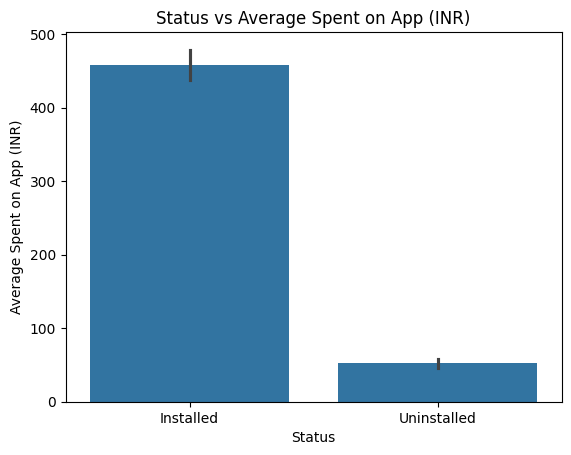

In [110]:
sns.barplot(data=data, x="Status", y="Average Spent on App (INR)")
plt.xlabel("Status")
plt.ylabel("Average Spent on App (INR)")
plt.title("Status vs Average Spent on App (INR)")
plt.show()

##11. Spending patterns of high-value users

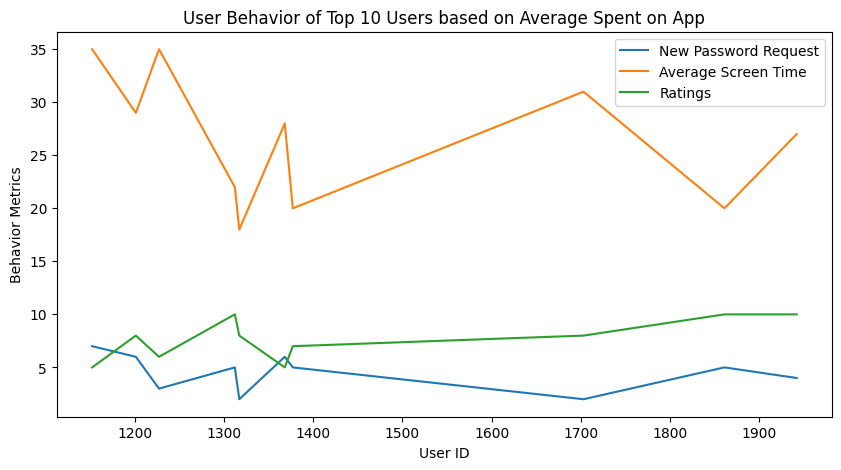

In [111]:
 # Top 10 users based on average spent on app
top_10_users_spent = data.sort_values(by='Average Spent on App (INR)', ascending=False).head(10)

# Line plot to visualize the behavior of top 10 users based on new password request
plt.figure(figsize=(10, 5))
sns.lineplot(data=top_10_users_spent, x='userid', y='New Password Request', label='New Password Request')
sns.lineplot(data=top_10_users_spent, x='userid', y='Average Screen Time (mins)', label='Average Screen Time')
sns.lineplot(data=top_10_users_spent, x='userid', y='Ratings', label='Ratings')
plt.xlabel('User ID')
plt.ylabel('Behavior Metrics')
plt.title('User Behavior of Top 10 Users based on Average Spent on App')
plt.legend()
plt.show()


##12.	New Password Requests v/s Ratings



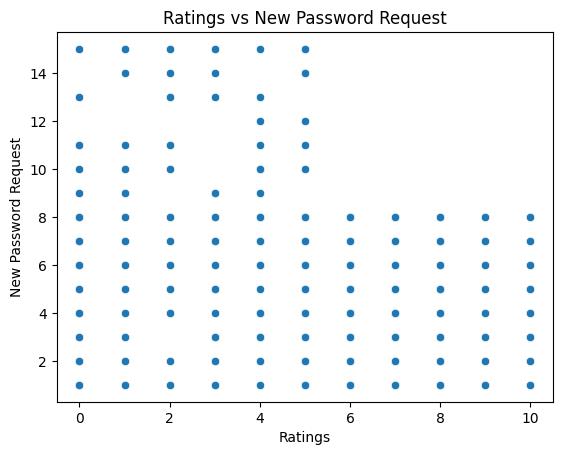

In [112]:
sns.scatterplot(data=data, x="Ratings", y="New Password Request")
plt.xlabel("Ratings")
plt.ylabel("New Password Request")
plt.title("Ratings vs New Password Request")
plt.show()
